In [1]:
import os
from copy import deepcopy

import numpy as np

import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)

In [ ]:
import torch
import torch.nn as nn

# 假设有 2 个样本和 3 个类别
output = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])  # 模型输出
target = torch.tensor([2, 0])  # 目标标签

criterion = nn.CrossEntropyLoss()
loss = criterion(output, target)

print(loss.item())  # 输出损失值

In [2]:
print(raw.info["bads"])

['MEG 2443', 'EEG 053']


Using matplotlib as 2D backend.


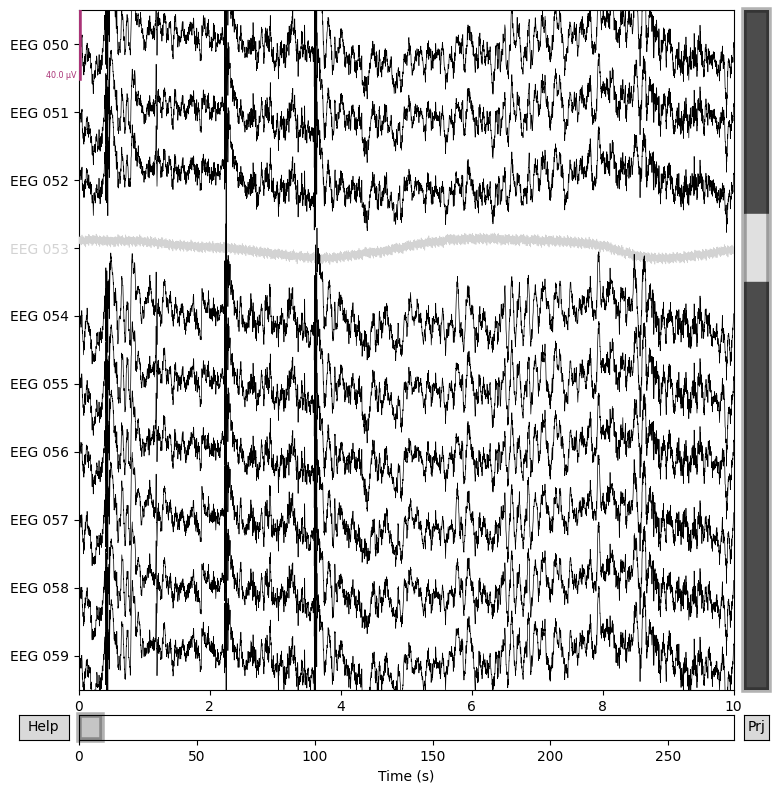

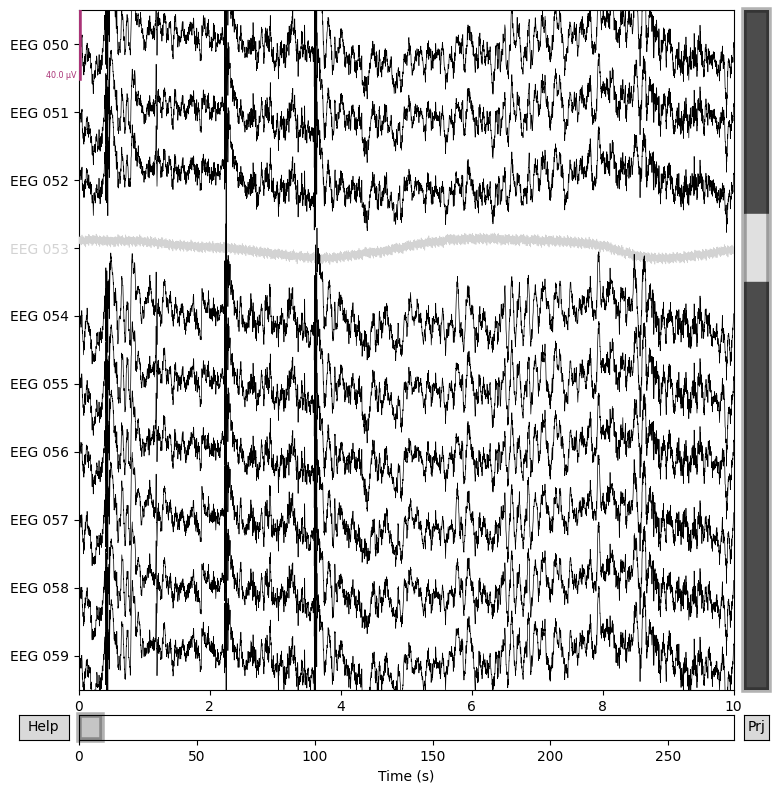

In [3]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp="EEG 05.")
raw.plot(order=picks, n_channels=len(picks))

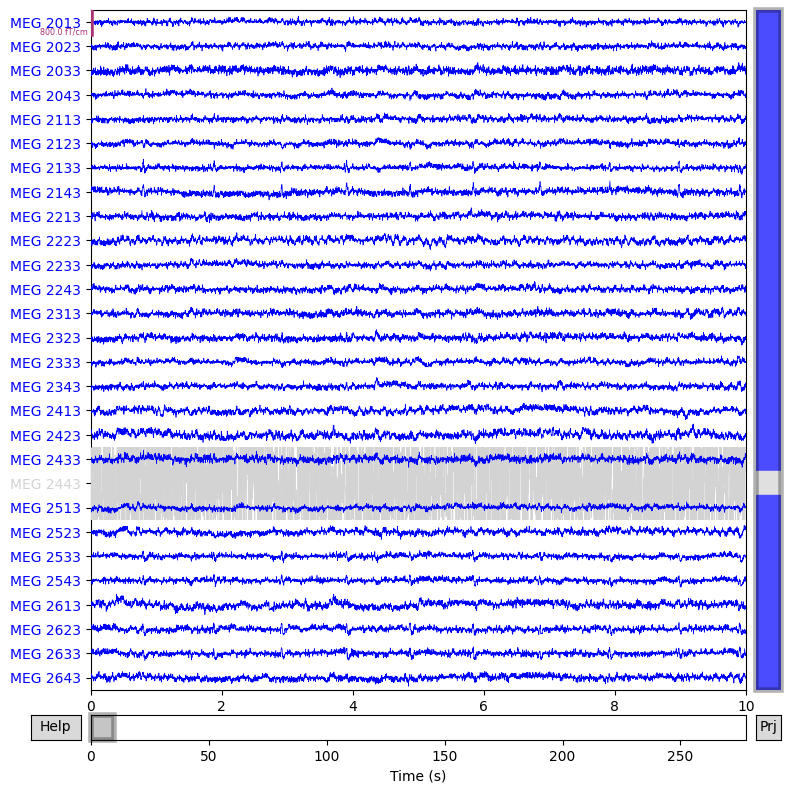

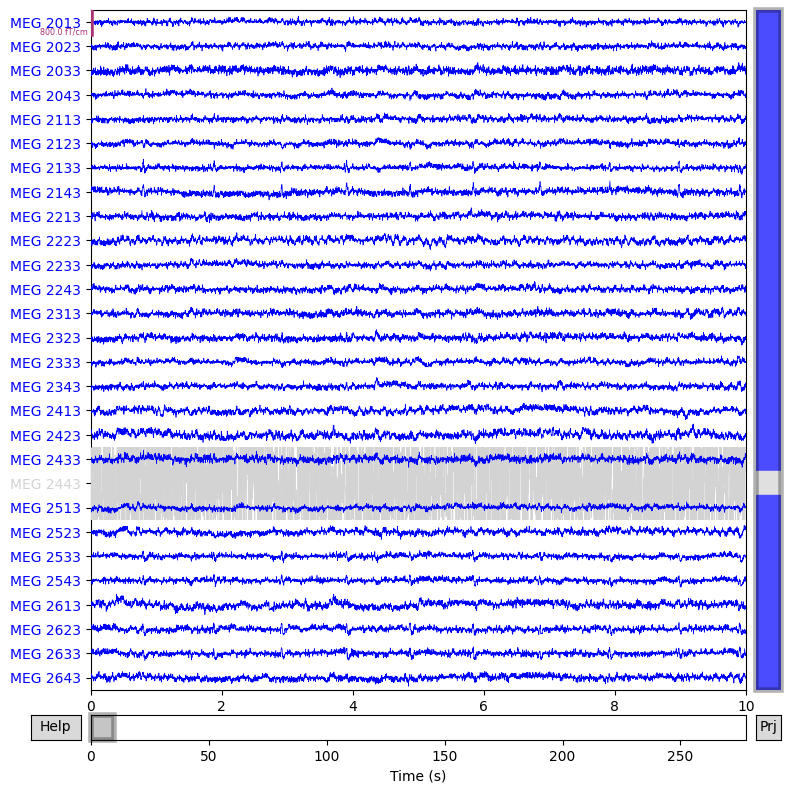

In [4]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp="MEG 2..3")
raw.plot(order=picks, n_channels=len(picks))

In [5]:
original_bads = deepcopy(raw.info["bads"])
raw.info["bads"].append("EEG 050")  # add a single channel
raw.info["bads"].extend(["EEG 051", "EEG 052"])  # add a list of channels
bad_chan = raw.info["bads"].pop(-1)  # remove the last entry in the list
raw.info["bads"] = original_bads  # change the whole list at once

In [6]:
# default is exclude='bads':
good_eeg = mne.pick_types(raw.info, meg=False, eeg=True)
all_eeg = mne.pick_types(raw.info, meg=False, eeg=True, exclude=[])
print(np.setdiff1d(all_eeg, good_eeg))
print(np.array(raw.ch_names)[np.setdiff1d(all_eeg, good_eeg)])

[367]
['EEG 053']


320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated


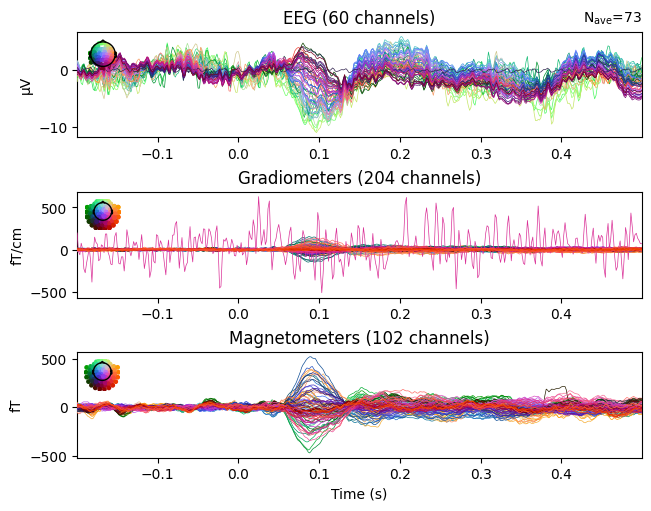

In [7]:
raw2 = raw.copy()
raw2.info["bads"] = []
events = mne.find_events(raw2, stim_channel="STI 014")
epochs = mne.Epochs(raw2, events=events)["2"].average().plot()

In [8]:
raw.crop(tmin=0, tmax=3).load_data()

Reading 0 ... 1802  =      0.000 ...     3.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 1803 (3.0 s), ~8.4 MB, data loaded>

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 91.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors


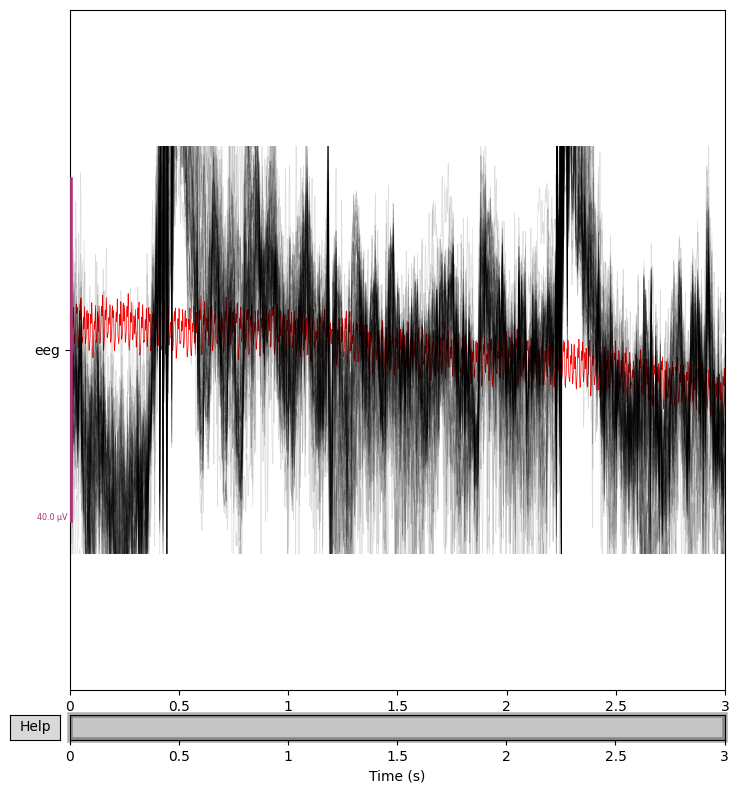

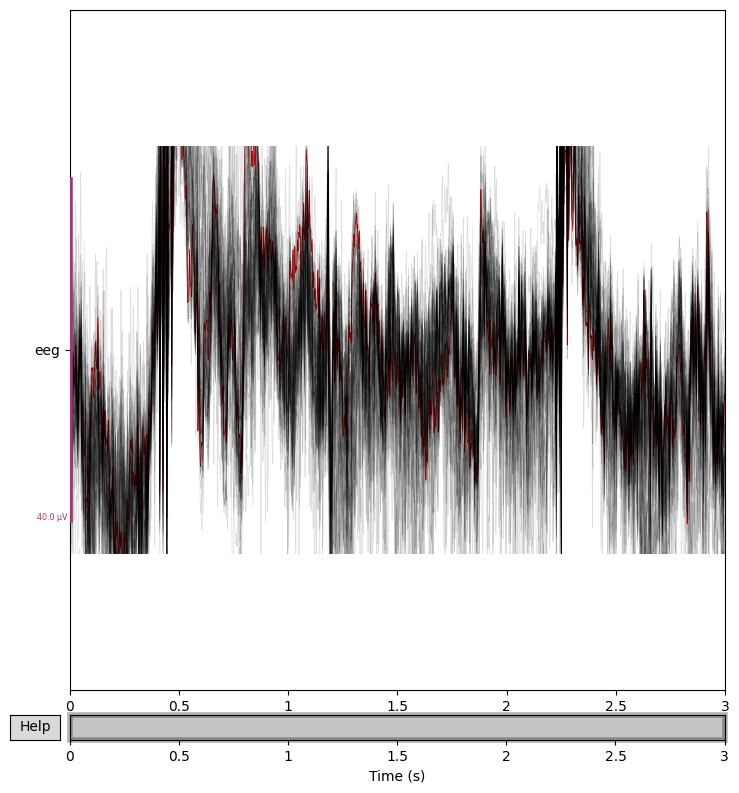

In [9]:
eeg_data = raw.copy().pick(picks="eeg")
eeg_data_interp = eeg_data.copy().interpolate_bads(reset_bads=False)

for title, data in zip(["orig.", "interp."], [eeg_data, eeg_data_interp]):
    with mne.viz.use_browser_backend("matplotlib"):
        fig = data.plot(butterfly=True, color="#00000022", bad_color="r")
    fig.subplots_adjust(top=0.9)
    fig.suptitle(title, size="xx-large", weight="bold")

Setting channel interpolation method to {'meg': 'MNE'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 91.0 mm
    Computing dot products for 203 MEG channels...
    Computing cross products for 203 → 1 MEG channel...
    Preparing the mapping matrix...
    Truncating at 84/203 components to omit less than 0.0001 (9.7e-05)


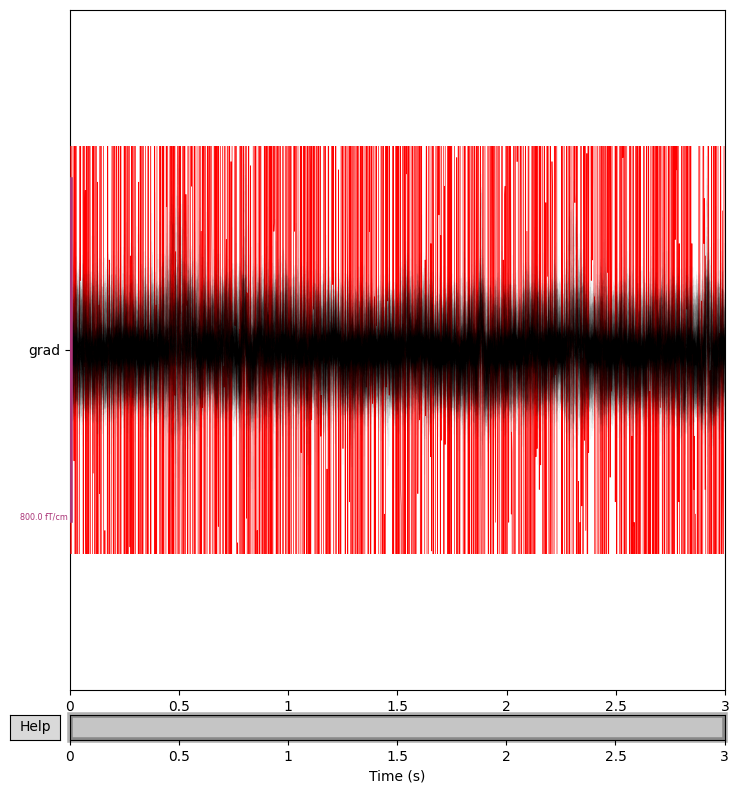

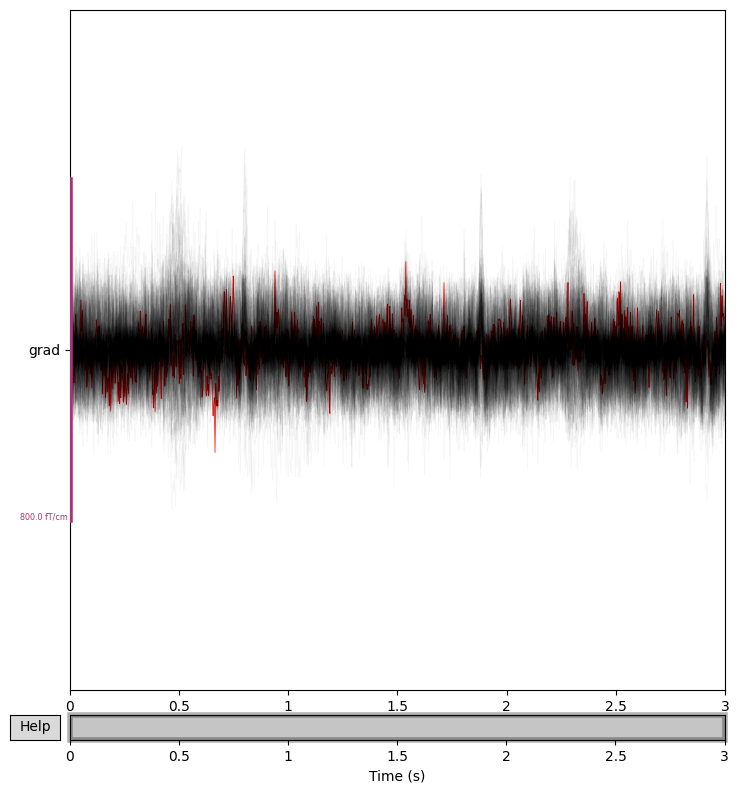

In [10]:
grad_data = raw.copy().pick(picks="grad")
grad_data_interp = grad_data.copy().interpolate_bads(reset_bads=False)

for data in (grad_data, grad_data_interp):
    data.plot(butterfly=True, color="#00000009", bad_color="r")